In [1]:
# import dependencies

import sys
from dotenv import load_dotenv
import time

import numpy as np
import pandas as pd
import sqlalchemy as sq
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

import tensorflow
from tensorflow import keras
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


/tmp/ipykernel_1283906/4204467282.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
2023-07-17 12:48:06.413513: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-17 12:48:06.911202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tensorflow.config.set_visible_devices([], 'GPU')  # Hide GPU devices
tensorflow.config.set_visible_devices(tensorflow.config.list_physical_devices('CPU'), 'CPU')  # Show CPU devices

2023-07-17 12:48:07.392796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-17 12:48:07.419972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-17 12:48:07.420260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
sys.path.append("../Datasets/")
from DataCreation import getDatasetV1, getDatasetV2, getDatasetV3

In [4]:
df = getDatasetV3(None)
df.drop(columns=['year', 'district'], inplace=True)
df.drop_duplicates(inplace=True)
df

,incidence,severity,soil_moisture_mean,avg_percnt_coarse_frag,avg_total_sand,avg_total_silt,avg_total_clay,avg_percnt_carbon,avg_calcium_ph,avg_proj_ph,...,avg_elec_cond,avg_percnt_wood,avg_water_holding_cap,avg_land_area,avg_water_area,mean_temp,mean_total_snow,mean_total_precip,mean_snow_on_grnd,mean_total_rain
0,False,0.00,0.185436,0.814580,10.151682,8.183592,5.607801,0.194739,1.715932,1.792265,...,0.333493,-2.156050,0.905770,12770.267922,221.887176,4.239744,0.116534,0.871078,0.860822,0.328105
232,False,0.00,0.191228,0.690591,10.608514,10.460087,7.514317,0.259585,2.069420,2.157495,...,0.304799,-2.574322,1.137961,13087.528444,192.432890,4.111654,0.057567,0.886408,0.366132,0.179473
812,False,0.00,0.211881,2.668642,8.133952,9.788505,5.406994,1.183456,1.676892,1.774827,...,-0.041658,-2.164751,1.066667,17233.988072,148.774415,3.060292,0.135583,1.299196,1.054999,0.332711
867,True,6.00,0.211881,2.668642,8.133952,9.788505,5.406994,1.183456,1.676892,1.774827,...,-0.041658,-2.164751,1.066667,17233.988072,148.774415,3.060292,0.135583,1.299196,1.054999,0.332711
942,True,5.00,0.211881,2.668642,8.133952,9.788505,5.406994,1.183456,1.676892,1.774827,...,-0.041658,-2.164751,1.066667,17233.988072,148.774415,3.060292,0.135583,1.299196,1.054999,0.332711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153945,True,0.01,0.190631,0.460367,4.409495,2.938889,2.217401,0.796337,0.844193,0.886403,...,0.074353,-0.899256,0.453346,11277.445473,2276.018926,4.056712,0.000000,0.987580,2.026941,0.000000
153984,False,0.00,0.213336,1.594342,8.935898,6.201733,3.749429,3.198366,1.526632,1.675191,...,-0.004176,-1.536164,1.112711,21658.425418,1080.856229,2.135123,0.012022,0.792169,2.987605,0.018595
154025,False,0.00,0.160965,0.436090,6.106002,5.060371,3.853177,0.163795,1.070126,1.101523,...,0.156734,-1.353354,0.580159,7924.783230,92.723080,5.014292,0.000000,0.711918,2.863470,0.000000
154030,False,0.00,0.164152,0.056900,7.443422,4.664707,3.409830,0.127013,1.114418,1.146940,...,0.147618,-1.396616,0.602533,10613.589319,224.180662,4.487671,0.000000,0.510411,2.073973,0.000000


In [5]:
df.columns

Index(['incidence', 'severity', 'soil_moisture_mean', 'avg_percnt_coarse_frag',
       'avg_total_sand', 'avg_total_silt', 'avg_total_clay',
       'avg_percnt_carbon', 'avg_calcium_ph', 'avg_proj_ph',
       'avg_water_reten_0', 'avg_water_reten_10', 'avg_water_reten_33',
       'avg_water_reten_1500', 'avg_bulk_density', 'avg_elec_cond',
       'avg_percnt_wood', 'avg_water_holding_cap', 'avg_land_area',
       'avg_water_area', 'mean_temp', 'mean_total_snow', 'mean_total_precip',
       'mean_snow_on_grnd', 'mean_total_rain'],
      dtype='object')

In [6]:
X = df.drop(columns=['incidence'])
y = df['incidence'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Oversampling
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [21]:
model = Sequential()

layers_node = [48, 32, 24, 16, 8, 1]

for i in range(len(layers_node)):
    if i == 0:
        model.add(Dense(layers_node[i], activation='relu', input_dim=X_train.shape[1]))
    elif(i == len(layers_node) - 1):
        model.add(Dense(layers_node[i], activation='sigmoid'))
    else:
        model.add(Dense(layers_node[i], activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 48)                1200      
                                                                 
 dense_13 (Dense)            (None, 32)                1568      
                                                                 
 dense_14 (Dense)            (None, 24)                792       
                                                                 
 dense_15 (Dense)            (None, 16)                400       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,105
Trainable params: 4,105
Non-traina

In [23]:
history = model.fit(X_resampled, y_resampled, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
157/157 [==============================] - 1s 2ms/step - loss: 0.6425 - accuracy: 0.6349 - val_loss: 1.0715 - val_accuracy: 0.0999
Epoch 2/500
157/157 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 0.6683 - val_loss: 0.9111 - val_accuracy: 0.2670
Epoch 3/500
157/157 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.6727 - val_loss: 0.8590 - val_accuracy: 0.4165
Epoch 4/500
157/157 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.6817 - val_loss: 0.9749 - val_accuracy: 0.3285
Epoch 5/500
157/157 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.6825 - val_loss: 0.9137 - val_accuracy: 0.3621
Epoch 6/500
157/157 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.6947 - val_loss: 1.0573 - val_accuracy: 0.2286
Epoch 7/500
157/157 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.6933 - val_loss: 0.9457 - val_accuracy: 0.3125

In [24]:
y_log = model.predict(X_test)
time.sleep(2)
y_pred = np.where(y_log > 0.5, 1, 0)

41/41 [==============================] - 0s 560us/step


In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("Accuracy: ", accuracy)

precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
print("Precision: ", precision)

recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print("Recall: ", recall)

f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score: ", f1_score)

print(classification_report(y_test, y_pred))

Accuracy:  0.7568199532346064
Precision:  0.845703125
Recall:  0.8490196078431372
F1 Score:  0.847358121330724
              precision    recall  f1-score   support

           0       0.41      0.40      0.40       263
           1       0.85      0.85      0.85      1020

    accuracy                           0.76      1283
   macro avg       0.63      0.62      0.62      1283
weighted avg       0.76      0.76      0.76      1283



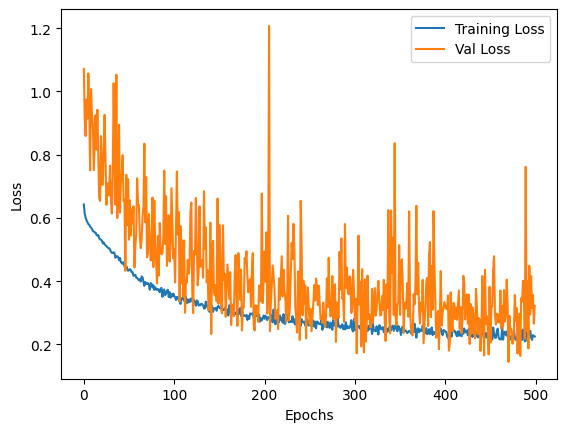

In [26]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

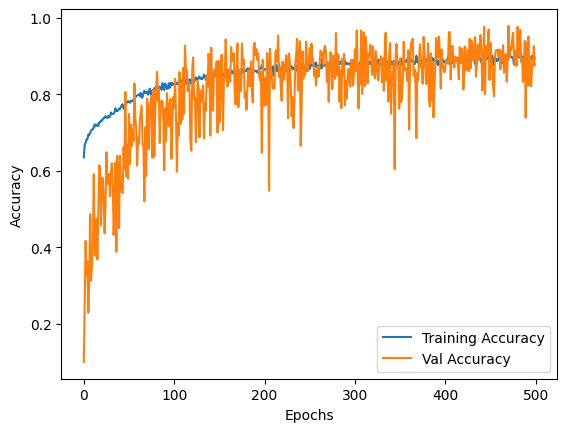

In [27]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

---
# datset v1
---
---
### 500 epoches
- [48, 32, 24, 16, 8, 1]
    - Accuracy:  0.6917293233082706
    - Precision:  0.8009049773755657
    - Recall:  0.8232558139534883
    - F1 Score:  0.8119266055045871
---

- [24, 24, 24, 24, 24, 1]
    - Accuracy:  0.6954887218045113
    - Precision:  0.8130841121495327
    - Recall:  0.8093023255813954
    - F1 Score:  0.8111888111888111  
---
 
- [32, 16, 32, 16, 8, 1]
    - Accuracy:  0.7443609022556391
    - Precision:  0.8075313807531381
    - Recall:  0.8976744186046511
    - F1 Score:  0.8502202643171807
---

---
# datset v2
---
---
### 200 epoches
- [48, 32, 24, 16, 8, 1]
    - Accuracy:  0.7568199532346064
    - Precision:  0.845703125
    - Recall:  0.8490196078431372
    - F1 Score:  0.847358121330724
---

- [24, 24, 24, 24, 24, 1]
    - Accuracy:  0.77431906614786
    - Precision:  0.8287037037037037
    - Recall:  0.895
    - F1 Score:  0.8605769230769231 
---
 
- [32, 16, 32, 16, 8, 1]
    - Accuracy:  0.8054474708171206
    - Precision:  0.8472222222222222
    - Recall:  0.915
    - F1 Score:  0.8798076923076923
---

---
# datset v3
---
---
### 500 epoches
- [48, 32, 24, 16, 8, 1]
    - Accuracy:  0.754863813229572
    - Precision:  0.8549222797927462
    - Recall:  0.825
    - F1 Score:  0.8396946564885495
---

- [24, 24, 24, 24, 24, 1]
    - Accuracy:  0.7272018706157444
    - Precision:  0.8609913793103449
    - Recall:  0.7833333333333333
    - F1 Score:  0.8203285420944558
---
 
- [32, 16, 32, 16, 8, 1]
    - Accuracy:  0.6812159002338269
    - Precision:  0.8739290085679314
    - Recall:  0.7
    - F1 Score:  0.7773543821448012
---